In [4]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import cv2
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from random import shuffle
import skimage
from skimage.transform import resize
import random

In [5]:
PARA_DIR = r"C:\Users\rjhcl\Desktop\malaria-detection\archive (6)\cell_images\cell_images\Parasitized"
UNIF_DIR =  r"C:\Users\rjhcl\Desktop\malaria-detection\archive (6)\cell_images\cell_images\Uninfected"

In [6]:
Pimages = os.listdir(PARA_DIR)
Nimages = os.listdir(UNIF_DIR)

In [8]:
data=[]
labels=[]
Parasitized=os.listdir(r"C:\Users\rjhcl\Desktop\malaria-detection\archive (6)\cell_images\cell_images\Parasitized/")
for a in Parasitized:
    try:
        image=cv2.imread(r"C:\Users\rjhcl\Desktop\malaria-detection\archive (6)\cell_images\cell_images\Parasitized/"+a)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((50, 50))
        data.append(np.array(size_image))
        labels.append(0)
    except AttributeError:
        print("")

Uninfected=os.listdir(r"C:\Users\rjhcl\Desktop\malaria-detection\archive (6)\cell_images\cell_images\Uninfected/")
for b in Uninfected:
    try:
        image=cv2.imread(r"C:\Users\rjhcl\Desktop\malaria-detection\archive (6)\cell_images\cell_images\Uninfected/"+b)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((50, 50))
        data.append(np.array(size_image))
        labels.append(1)
    except AttributeError:
        print("")

In [9]:
Cells=np.array(data)
labels=np.array(labels)

In [10]:
np.save("Cells",Cells)
np.save("labels",labels)

In [11]:
Cells=np.load("Cells.npy")
labels=np.load("labels.npy")

In [12]:
s=np.arange(Cells.shape[0])
np.random.shuffle(s)
Cells=Cells[s]
labels=labels[s]

In [13]:
num_classes=len(np.unique(labels))
len_data=len(Cells)

In [14]:
(x_train,x_test)=Cells[(int)(0.1*len_data):],Cells[:(int)(0.1*len_data)]
x_train = x_train.astype('float32')/255 # As we are working on image data we are normalizing data by divinding 255.
x_test = x_test.astype('float32')/255
train_len=len(x_train)
test_len=len(x_test)

In [15]:
(y_train,y_test)=labels[(int)(0.1*len_data):],labels[:(int)(0.1*len_data)]

In [16]:
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

In [17]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
np.random.seed(0)

In [18]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu",input_shape=(50,50,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(2,activation="softmax"))#2 represent output layer neurons 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 32)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 32)        4128      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        4

In [19]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss', save_best_only=True)]

In [21]:
h=model.fit(x_train,y_train,batch_size=32,callbacks=callbacks, validation_data=(x_test,y_test)
            ,epochs=20,verbose=1)

Epoch 1/20
776/776 [==============================] - 56s 71ms/step - loss: 0.5876 - accuracy: 0.6551 - val_loss: 0.1856 - val_accuracy: 0.9347
Epoch 2/20
776/776 [==============================] - 54s 70ms/step - loss: 0.1947 - accuracy: 0.9340 - val_loss: 0.1638 - val_accuracy: 0.9506
Epoch 3/20
776/776 [==============================] - 54s 70ms/step - loss: 0.1626 - accuracy: 0.9490 - val_loss: 0.1559 - val_accuracy: 0.9535
Epoch 4/20
776/776 [==============================] - 55s 71ms/step - loss: 0.1568 - accuracy: 0.9515 - val_loss: 0.1492 - val_accuracy: 0.9550
Epoch 5/20
776/776 [==============================] - 55s 71ms/step - loss: 0.1495 - accuracy: 0.9542 - val_loss: 0.1454 - val_accuracy: 0.9564
Epoch 6/20
776/776 [==============================] - 54s 70ms/step - loss: 0.1392 - accuracy: 0.9561 - val_loss: 0.1496 - val_accuracy: 0.9557
Epoch 7/20
776/776 [==============================] - 55s 71ms/step - loss: 0.1397 - accuracy: 0.9549 - val_loss: 0.1433 - val_accuracy:

In [22]:
from numpy import loadtxt
from keras.models import load_model
model = load_model('.mdl_wts.hdf5')

In [23]:
score=model.evaluate(x_test,y_test)
print(score)

87/87 [==============================] - 2s 16ms/step - loss: 0.1357 - accuracy: 0.9568
[0.13572119176387787, 0.9568058252334595]


In [24]:
accuracy = model.evaluate(x_test, y_test, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy[1])

87/87 [==============================] - 2s 18ms/step - loss: 0.1357 - accuracy: 0.9568 0s - loss: 0.1316 - accura

 Test_Accuracy:- 0.9568058252334595


In [25]:
from sklearn.metrics import confusion_matrix
pred = model.predict(x_test)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1)

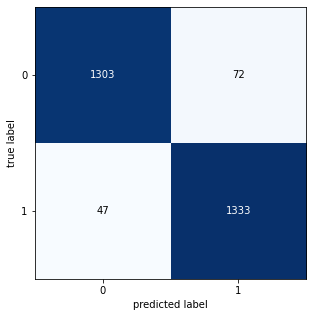

In [27]:
CM = confusion_matrix(y_true, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

In [35]:
pred = model.predict(x_test,batch_size=1)
pred = np.argmax(pred,axis = 1)

In [36]:
pred[0]

0

In [37]:
!mkdir models_app

A subdirectory or file models_app already exists.


In [38]:
model.save(r'C:\Users\rjhcl\Downloads\Web_App_disease_detection-master\Web_App_disease_detection-master\my_model.h5')

In [39]:
y_hat = model.predict(x_test)
malaria_labels = ['Parasitized','Uninfected']